# Electron Cooling

In [1]:
%load_ext autoreload

## Notebook Initialization

In [2]:
%autoreload
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [10,10]

import numpy as np
import pickle
import copy

from astropy.io import fits


np.set_printoptions(threshold=np.nan)


import darkhistory.physics as phys
from darkhistory.spec.spectrum import Spectrum
import darkhistory.spec.transferfunction as tf
import darkhistory.utilities as utils
import darkhistory.spec.spectools as spectools

from darkhistory.electrons.ics.ics_spectrum import ics_spec
from darkhistory.electrons.ics.ics_engloss_spectrum import engloss_spec

## Import ICS Tables

In [3]:
raw_nonrel_ICS_tf = pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/ICS_nonrel.raw","rb"))
raw_rel_ICS_tf = pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/ICS_rel.raw","rb"))
raw_engloss_tf = pickle.load(open("/Users/hongwan/Dropbox (MIT)/Photon Deposition/ICS_englossspec.raw","rb"))

Prepare the ICS transfer functions from these files. For checks with original code, we need to construct `eleceng` and `photeng` in the same way.

In [4]:
mwimp = 1e12
neng = 500
dlneng = np.log(mwimp)/neng
elecbins = np.exp(np.arange(neng+1)*dlneng)
englow = elecbins[0:neng]
enghigh = elecbins[1:]
eleceng = np.sqrt(englow*enghigh)

nphoteng = 500
dlnphoteng = np.log(mwimp/1e-2)/nphoteng
photenglow = 1e-2*np.exp(np.arange(nphoteng)*dlnphoteng)
photenghigh = 1e-2*np.exp((np.arange(nphoteng)+1)*dlnphoteng)
photeng = np.sqrt(photenglow*photenghigh)


In [5]:
# eleceng = 10**np.arange(0, 12, 0.024)
# photeng = 10**np.arange(-2, 12, 0.028)
T = phys.TCMB(1000)

ICS_tf = ics_spec(eleceng, photeng, T, 
                  nonrel_tf = raw_nonrel_ICS_tf, rel_tf = raw_rel_ICS_tf
                 )

engloss_tf = engloss_spec(eleceng, photeng, T, 
                          nonrel_tf = raw_engloss_tf, 
                          rel_tf = raw_rel_ICS_tf
                         )

print(eleceng.size, photeng.size)

500 500


Check that everything is working as expected...

[0.0001, 10000000000000.0, 1e-16, 1000.0]

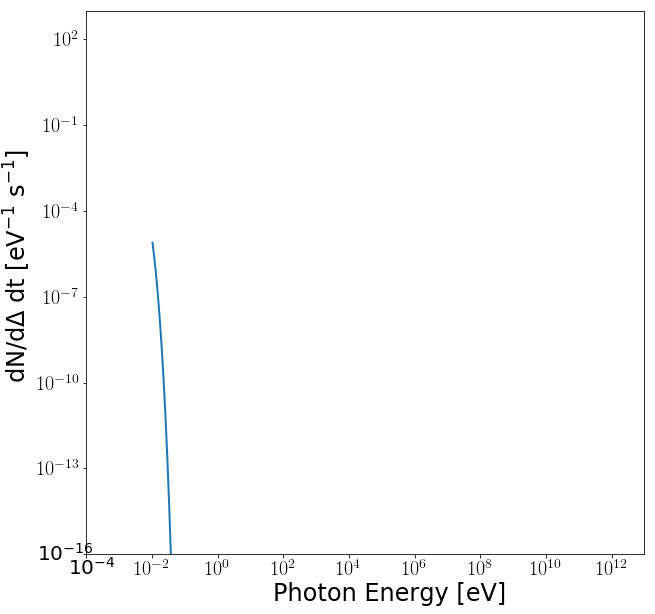

In [6]:
ax = plt.subplot(1,1,1)
plt.rc('text', usetex=True)
# comp_elec_kineng = np.array([1,1e4, 1e7, 1e8, 1e10, 1e11])

# engloss_tf.plot(ax, ind=comp_elec_kineng, indtype='in_eng', linewidth=2)
engloss_tf.plot(ax, ind=3, indtype='ind', linewidth=2)

ax.set_xscale('log')
ax.set_yscale('log')

plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlabel('Photon Energy [eV]',fontsize=24)

plt.ylabel('dN/d$\Delta$ dt [eV$^{-1}$ s$^{-1}$]',fontsize=24)
plt.axis([1e-4, 1e13, 1e-16, 1e3])

In [7]:
engloss_tf[3].totN('bin')

array([  5.14739165e-09,   3.01527044e-09,   1.69540657e-09,
         9.04550424e-10,   4.55879403e-10,   2.18391048e-10,
         9.91894879e-11,   4.25980950e-11,   1.68021527e-11,
         6.20411862e-12,   2.13726242e-12,   6.84506760e-13,
         1.99682059e-13,   5.26323034e-14,   1.26745182e-14,
         2.77569166e-15,   5.50188979e-16,   9.37155721e-17,
         1.41915448e-17,   1.89899366e-18,   2.23138749e-19,
         2.21974213e-20,   1.84275693e-21,   1.30210744e-22,
         7.76702357e-24,   3.87801558e-25,   1.47732622e-26,
         4.56225487e-28,   1.12978812e-29,   2.21855781e-31,
         3.23626281e-33,   3.41797495e-35,   2.70736553e-37,
         1.58479695e-39,   6.75259045e-42,   1.77496010e-44,
         3.20718297e-47,   3.90697164e-50,   3.14528245e-53,
         1.48915362e-56,   3.96066106e-60,   6.30179999e-64,
         5.84239984e-68,   3.07182995e-72,   6.81659628e-77,
         7.74509808e-82,   4.35219246e-87,   1.16710440e-92,
         1.21278561e-98,

In [8]:
sec_elec_tf = copy.deepcopy(engloss_tf)

for in_eng, spec in zip(sec_elec_tf.get_in_eng(), sec_elec_tf):
    spec.engloss_rebin(in_eng, sec_elec_tf.get_in_eng())

[0.0001, 1000000000000.0, 1e-16, 1000.0]

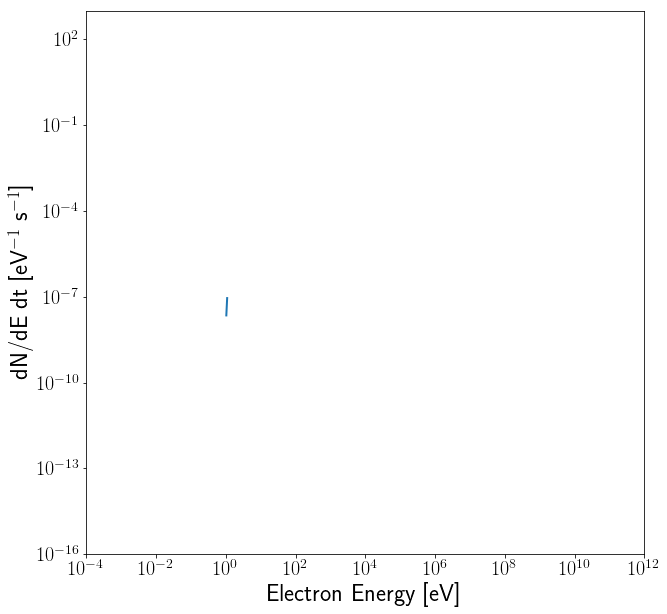

In [9]:
ax = plt.subplot(1,1,1)
plt.rc('text', usetex=True)
# comp_elec_kineng = np.array([1,1e4, 1e7, 1e8, 1e10, 1e11])

# sec_elec_tf.plot(ax, ind=comp_elec_kineng, indtype='in_eng', linewidth=2)
sec_elec_tf.plot(ax, ind=1, indtype='ind', linewidth=2)

ax.set_xscale('log')
ax.set_yscale('log')

plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlabel('Electron Energy [eV]',fontsize=24)

plt.ylabel('dN/dE dt [eV$^{-1}$ s$^{-1}$]',fontsize=24)
plt.axis([1e-4, 1e12, 1e-16, 1e3])

In [10]:
print(sec_elec_tf.get_eng())
sec_elec_tf[30].totN('bin')

[  1.02801630e+00   1.08642562e+00   1.14815362e+00   1.21338885e+00
   1.28233058e+00   1.35518941e+00   1.43218790e+00   1.51356125e+00
   1.59955803e+00   1.69044093e+00   1.78648757e+00   1.88799135e+00
   1.99526231e+00   2.10862815e+00   2.22843515e+00   2.35504928e+00
   2.48885732e+00   2.63026799e+00   2.77971327e+00   2.93764965e+00
   3.10455959e+00   3.28095293e+00   3.46736850e+00   3.66437575e+00
   3.87257645e+00   4.09260660e+00   4.32513831e+00   4.57088190e+00
   4.83058802e+00   5.10505000e+00   5.39510623e+00   5.70164272e+00
   6.02559586e+00   6.36795521e+00   6.72976656e+00   7.11213514e+00
   7.51622894e+00   7.94328235e+00   8.39459987e+00   8.87156012e+00
   9.37562007e+00   9.90831945e+00   1.04712855e+01   1.10662378e+01
   1.16949939e+01   1.23594743e+01   1.30617089e+01   1.38038426e+01
   1.45881426e+01   1.54170045e+01   1.62929603e+01   1.72186857e+01
   1.81970086e+01   1.92309173e+01   2.03235701e+01   2.14783047e+01
   2.26986485e+01   2.39883292e+01

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   4.55962233e-63,   8.76750713e-08,
         1.92757154e-06,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [11]:
pri_elec = np.array([spec.totN() for spec in sec_elec_tf])
pri_elec *= sec_elec_tf.get_in_eng()
sec_elec = np.array([spec.toteng() for spec in sec_elec_tf])
sec_phot = np.array([spec.toteng() for spec in ICS_tf])
CMB_phot = phys.CMB_eng_density(T)*phys.thomson_xsec*phys.c*np.ones_like(sec_phot)

utils.compare_arr([pri_elec, sec_elec, sec_phot, CMB_phot])
# 
# print(c - phys.CMB_eng_density(T)*phys.thomson_xsec*phys.c)
# print(a-b-c+phys.CMB_eng_density(T)*phys.thomson_xsec*phys.c)

[[ 5.1185384e-09  5.0634459e-09  0.0051861998  0.0051966997]
 [ 7.2178155e-09  7.1441031e-09  0.0051862014  0.0051966997]
 [ 1.0109722e-08  1.0011749e-08  0.0051862031  0.0051966997]
 [ 1.4081103e-08  1.39516e-08  0.0051862048  0.0051966997]
 [ 1.9404607e-08  1.9235232e-08  0.0051862067  0.0051966997]
 [ 2.6575945e-08  2.6355763e-08  0.0051862087  0.0051966997]
 [ 3.6211272e-08  3.5926473e-08  0.0051862108  0.0051966997]
 [ 4.8857417e-08  4.8492618e-08  0.005186213  0.0051966997]
 [ 6.5547497e-08  6.5082814e-08  0.0051862154  0.0051966997]
 [ 8.7527402e-08  8.693818e-08  0.0051862178  0.0051966997]
 [ 1.1582336e-07  1.1508292e-07  0.0051862205  0.0051966997]
 [ 1.5247308e-07  1.515473e-07  0.0051862232  0.0051966997]
 [ 1.9986142e-07  1.987087e-07  0.0051862261  0.0051966997]
 [ 2.5979785e-07  2.5837441e-07  0.0051862292  0.0051966997]
 [ 3.3610675e-07  3.343571e-07  0.0051862325  0.0051966997]
 [ 4.3313251e-07  4.3098996e-07  0.0051862359  0.0051966997]
 [ 5.5388293e-07  5.5127919e-07

0

In [60]:
# Fully resolved photon spectrum transfer function.
# Takes in number of electrons, returns dN/(dE dt) of scattered photons.
sec_phot_tf = tf.TransFuncAtRedshift([], dlnz=-1, rs=ICS_tf.rs)
# Fully resolved low energy electron transfer function. 
lowengelec_tf = tf.TransFuncAtRedshift([], dlnz=-1, rs=ICS_tf.rs)

# Electron energies below/above the low energy cut-off
eleceng_high = eleceng[eleceng > 3000]
eleceng_low  = eleceng[eleceng <= 3000]

eleceng_high_ind = np.arange(eleceng.size)[eleceng > 3000]
eleceng_low_ind  = np.arange(eleceng.size)[eleceng <= 3000]

# High energy portions of the primary ICS transfer functions.

# Takes in number of electrons, returns dN/(dE dt) of scattered photons. 
ICS_tf_high = tf.TransFuncAtRedshift(
    ICS_tf[eleceng_high_ind[0]:], dlnz=-1, rs=ICS_tf.rs
)
# Takes in number of electrons, returns dN/(dE dt) of scattered electrons.
# Only for high energy electrons scattering into high energy electrons.
sec_elec_tf_high = sec_elec_tf.at_val(
    eleceng_high_ind, eleceng_high_ind, interp_type='bin'
)

# For high energy electrons scattering into low energy electrons. 
sec_elec_tf_low = sec_elec_tf.at_val(
    eleceng_high_ind, eleceng_low_ind, interp_type='bin'
)

# Begin resolving secondaries by marching up.
# To build sec_phot_tf, we inject delta function electrons at each energy
# in eleceng_high, and then resolve them. Secondary electrons are resolved
# recursively. 
delta_spec = np.zeros_like(eleceng_high)
for i,eng in zip(np.arange(eleceng_high.size), eleceng_high):
    delta_spec *= 0
    delta_spec[i] = 1
    # Scatter this into scattered secondary photons and secondary electrons.
    # sec_phot_N and sec_highengelec_N are lists of dN/dt. 
    sec_phot_N = spectools.scatter(
        ICS_tf_high, mode='N', out_mode='N', 
        eng_arr = eleceng_high, N_arr = delta_spec, new_eng = photeng
    )
    sec_highengelec_N = spectools.scatter(
        sec_elec_tf_high, mode='N', out_mode='N',
        eng_arr = eleceng_high, N_arr = delta_spec, new_eng = eleceng_high
    )
    # Scatter into low energy electrons.
    sec_lowengelec_N = spectools.scatter(
        sec_elec_tf_low, mode='N', out_mode='N',
        eng_arr = eleceng_high, N_arr = delta_spec, new_eng = eleceng_low
    )
    
    # Total energy of primary electrons scattered (per second)
    # Should be extended to multiple processes. 
    pri_elec_totN = np.sum(sec_highengelec_N) + np.sum(sec_lowengelec_N)
    pri_elec_toteng = pri_elec_totN*eng
    
    # Total energy of secondary electrons (both low and high energy)
    sec_elec_toteng = (
        np.sum(sec_highengelec_N*eleceng_high) 
        + np.sum(sec_lowengelec_N*eleceng_low)
    )
    
    # Total continuum energy loss. Defined positive. 
    continuum_engloss = phys.thomson_xsec*phys.c*phys.CMB_eng_density(T)
    
    # 'Deposited' ICS energy. Primary electron power loss - 
    # secondary electron power gain - 
    # (secondary photon power gain - original CMB photon energy) 
    # This should be zero technically, but we use it to force 
    # energy conservation. 
    
    ics_deposited_eng = (
        pri_elec_toteng - sec_elec_toteng
        - (np.sum(sec_phot_N*photeng) - continuum_engloss)
    )
    
    # If relativistic, sec_elec_toteng neglected to remove the initial
    # photon energy. 
    if eng + phys.me > 20*phys.me:
        ics_deposited_eng - continuum_engloss
        
    # Convert everything into dN/dt per scattering. 
    sec_phot_N /= pri_elec_totN
    sec_highengelec_N /= pri_elec_totN
    sec_lowengelec_N  /= pri_elec_totN
    
    # fraction of eng per second per scattering. 
    sec_phot_frac = sec_phot_N*photeng/eng
    sec_highengelec_frac = sec_highengelec_N*eleceng_high/eng
    sec_lowengelec_frac  = sec_lowengelec_N *eleceng_low /eng
    
    # total fraction of eng per second per scattering going into secondaries. 
    tot_frac = (
        np.sum(sec_phot_frac)
        + np.sum(sec_highengelec_frac)
        + np.sum(sec_lowengelec_frac)
    )
    
    # Remove the self-scattering bin, rescale.
    rescale_fac = 1 - (sec_highengelec_frac[i]/(tot_frac))
    sec_highengelec_frac[i] = 0
    
    sec_phot_frac *= rescale_fac
    sec_highengelec_frac *= rescale_fac
    sec_lowengelec_frac *= rescale_fac

    
    # Resolve the electron secondaries. Start resolving only when i>0,
    # since before there are no secondary high electrons to resolve.
    if i>0:
        # Take everything below the bin of interest, i.e. only electrons
        # that have scattered.
        scattered_elec_N = sec_highengelec_N[0:i]
        # These are resolved by applying sec_phot_tf to it. We haven't
        # built sec_phot_tf yet, because the i = 0 case will be built
        # outside of this if statement. 
        
        # The resolved spectrum is a dN/dt of additional secondary photons
        # from scattering the secondary electrons down. 
        resolved_phot_spec_N = spectools.scatter(
            sec_phot_tf, mode='N', out_mode='N',
            eng_arr = eleceng_high[0:i], N_arr=scattered_elec_N,
            new_eng = photeng
        )
        # Add this to the secondary photons from the scatter of the primary. 
        sec_phot_N += resolved_phot_spec_N
        # Additional low energy electrons
#         sec_elec_tf_resolved = sec_elec_tf.at_val(eleceng_high_ind[0:i], eleceng_low_ind, interp_type='bin')
#         resolved_lowengelec = spectools.scatter(
#             sec_elec_tf_resolved, mode='N', out_mode='dNdE',
#             eng_arr = eleceng_high[0:i], N_arr = scattered_elec_N,
#             new_eng = eleceng_low
#         )
#         # Check energies
#         if i > 1:
#             init_eng = np.sum(scattered_elec_N*eleceng_high[0:i]*spectools.get_log_bin_width(eleceng_high[0:i]))
#             fin_eng  = np.sum(resolved_phot_spec_N*photeng*spectools.get_log_bin_width(photeng))
#             print(init_eng, fin_eng, resolved_lowengelec.toteng())
    
    # sec_phot_N is now the dN/dt of all photons produced by the primary. 
    # However, the total energy is *not* the rate of energy loss by the
    # primary, since we have not subtracted the initial photon energy. 
    
    # We will treat the initial photon energy by treating it as an energy
    # *loss*. continuum_engloss is dE/dt of this loss. 
    continuum_engloss = -phys.thomson_xsec*phys.c*phys.CMB_eng_density(T)
    
    # Get the energy loss rate of the primary. It is the total number
    # of secondary electrons produced (both high and low energy) i.e.
    # the number of scatters times the energy of the primary. 
    pri_elec_N = np.sum(sec_highengelec_N) + np.sum(sec_lowengelec_N)
    # Subtract the continuum loss for relativistic electrons, since we
    # do not subtract the loss for the secondary electrons. 
#     if eng + phys.me > 20*phys.me:
#         pri_elec_N += continuum_engloss
    
    # Normalize sec_phot_N to per scatter
    sec_phot_N /= pri_elec_N
    # Get the energy in the fully resolved photon spectrum
    sec_phot_eng = sec_phot_N*photeng
    # Fraction of energy in each photon bin.  
    sec_phot_frac = sec_phot_eng/np.sum(sec_phot_eng)
    # Fraction of energy of the primary going into continuum loss.
    cont_frac = continuum_engloss/pri_elec_toteng
#     print(cont_frac)
    
    # Number of secondary photons in the end, for transfer function. 
    # The energy in each bin is sec_phot_frac*(eng - cont_frac*eng), 
    # since -cont_frac*eng adds the initial then we divide by 
    # photeng to get the number. 
    sec_phot_N = sec_phot_frac*(eng - cont_frac*eng)/photeng
    print(np.sum(sec_phot_N*photeng) + cont_frac*eng - eng, ics_deposited_eng/pri_elec_N)
    sec_phot_spec = spectools.rebin_N_arr(sec_phot_N, photeng)
    sec_phot_spec.in_eng = eng
    sec_phot_spec.rs = ICS_tf.rs
    
    sec_phot_tf.append(sec_phot_spec)
    
    
    
    
        
    

-1.10578213253e-13 9.92049927733e-06
-1.19682042055e-13 9.87959614666e-06
1.28563826252e-13 9.9485775157e-06
8.19344592173e-14 9.84741816949e-06
-1.23234755733e-13 9.79935274788e-06
-2.04281036531e-14 9.87909914678e-06
2.45137243837e-13 9.76188053142e-06
3.01980662698e-13 9.7067959356e-06
-5.55111512313e-14 9.79981613989e-06
-4.61852778244e-14 9.6642432031e-06
-4.70734562441e-14 9.60045835695e-06
-1.26121335597e-13 9.70734429115e-06
2.70894418009e-13 9.55099766008e-06
9.7699626167e-14 9.47853977083e-06
3.07753822426e-13 9.60279049797e-06
-3.40616423955e-13 9.42262959791e-06
3.73479025484e-13 9.33993885743e-06
3.51274564991e-13 9.48310895746e-06
6.75015598972e-13 9.27685233179e-06
-2.11386463889e-13 9.18364193736e-06
-6.76791955811e-13 9.34884258647e-06
2.51354492775e-13 9.11400709374e-06
-2.72670774848e-13 9.00888711192e-06
-7.19424519957e-13 9.19759357031e-06
5.75539615966e-13 8.93116329011e-06
-6.2172489379e-15 8.81443749617e-06
8.45545855555e-13 9.03116367119e-06
5.43565192856e-13 8

In [13]:
# # %%prun
# sec_phot_tf = tf.TransFuncAtRedshift([], dlnz=-1)
# sec_phot_tf.rs = ICS_tf.rs
# lowengelec_tf = tf.TransFuncAtRedshift([], dlnz=-1)
# lowengelec_tf.rs = ICS_tf.rs
# elec_high_eng = eleceng[eleceng > 3000]
# elec_low_eng  = eleceng[eleceng <= 3000]

# highengelec_ind = np.arange(eleceng.size)[eleceng > 3000]
# lowengelec_ind  = np.arange(eleceng.size)[eleceng <= 3000]

# elec_high_eng_bin_width = spectools.get_log_bin_width(elec_high_eng)
# photeng_bin_width = spectools.get_log_bin_width(photeng)


# ICS_tf_high_eng = tf.TransFuncAtRedshift(
#     ICS_tf[highengelec_ind[0]:], dlnz=-1)

# sec_elec_tf_high_eng = sec_elec_tf.at_val(
#     highengelec_ind, highengelec_ind, interp_type='bin'
# )

# sec_elec_tf_low_eng = sec_elec_tf.at_val(
#     highengelec_ind, lowengelec_ind, interp_type='bin'
# )

# delta_spec = np.zeros_like(elec_high_eng)
# for i,eng in zip(np.arange(elec_high_eng.size), elec_high_eng):
#     delta_spec *= 0
#     delta_spec[i] = 1  
#     sec_phot_spec_N = spectools.scatter(ICS_tf_high_eng, mode='N', out_mode='N',
#                                       eng_arr = elec_high_eng, N_arr = delta_spec, new_eng=photeng)
#     sec_elec_spec_N = spectools.scatter(sec_elec_tf_high_eng, mode='N', out_mode='N',
#                                       eng_arr = elec_high_eng, N_arr = delta_spec, new_eng=elec_high_eng)
#     # Total energy of primary electrons scattered in 1 second
#     pri_elec_toteng = np.sum(sec_elec_spec_N*eng)
# #     # Total energy in secondary photon spectrum
#     sec_phot_toteng = np.sum(sec_phot_spec_N*photeng*photeng_bin_width)
# #     # Total energy in secondary electron spectrum
#     sec_elec_toteng = np.sum(sec_elec_spec_N*elec_high_eng*elec_high_eng_bin_width)
# #     # Total energy of the CMB photons that were upscattered. 
#     scattered_CMB_toteng = phys.thomson_xsec*phys.c*phys.CMB_eng_density(T)

#     sec_lowengelec_spec = spectools.scatter(sec_elec_tf_low_eng, mode='N', out_mode='dNdE',
#                                             eng_arr = elec_high_eng, N_arr = delta_spec, new_eng=elec_low_eng)
#     sec_lowengelec_spec.in_eng = eng
#     if sec_phot_tf.spec_arr and i > 0:
#         rescatter_spec_N = sec_elec_spec_N[0:i]
#         # normalize to one secondary
# #         rescatter_spec_N /= np.sum(rescatter_spec_N)
#         sec_phot_spec_N += spectools.scatter(sec_phot_tf, mode='N', out_mode='N', 
#                                           eng_arr = elec_high_eng[0:i], N_arr = rescatter_spec_N, new_eng = photeng)
    
# #  sec_phot_spec_N is the total photon spectrum after 1 second due to 
# #  scattering of 1 electron.
# #     sec_phot_spec_N /= sec_phot_toteng*(pri_elec_toteng - sec_elec_toteng + scattered_CMB_toteng)
# # Normalized to the correct dE_gamma/dt for incoming primary energy loss rate. 
# #     sec_phot_spec_N_toteng = np.sum(sec_phot_spec_N*photeng*photeng_bin_width)
# #     sec_phot_spec_N = sec_phot_spec_N/sec_phot_spec_N_toteng*(1 + scattered_CMB_toteng/pri_elec_toteng)*eng
#     sec_phot_spec = spectools.rebin_N_arr(sec_phot_spec_N, photeng)
#     sec_phot_spec.in_eng = eng
#     sec_phot_spec.rs = ICS_tf.rs
    
# #     if eng + phys.me < 20*phys.me:
# #         eng_in_sec_phot = eng - sec_phot_spec.toteng() + phys.thomson_xsec*phys.c*phys.CMB_eng_density(T)
# #     else:
# #         eng_in_sec_phot = eng - sec_phot_spec.toteng()
    
# #     sec_phot_spec_norm = sec_phot_spec*eng_in_sec_phot/sec_phot_spec.toteng()
# #     if i == 2:
# #         utils.compare_arr([sec_phot_spec.dNdE, sec_phot_spec_norm.dNdE])
#     if eng + phys.me > 20*phys.me:
#         sec_phot_spec = sec_phot_spec/sec_phot_spec.toteng()*eng
#     else:
#         sec_phot_spec = sec_phot_spec/sec_phot_spec.toteng()*eng
#     # This is not correct for below 20*phys.me
#     sec_phot_tf.append(sec_phot_spec)
# #     lowengelec_tf.append(sec_lowengelec_spec)

        
        
    

In [14]:
ICS_test_filename = "/Users/hongwan/Dropbox (MIT)/Photon Deposition/ICS_test.fits"
ICS_test = fits.open(ICS_test_filename)
ICS_test_spec = ICS_test[0].data
ICS_test_spec = np.transpose(ICS_test_spec)
ICS_test_list_spec = [Spectrum(photeng, arr, in_eng=in_eng) for (arr, in_eng) in zip(ICS_test_spec, eleceng)]
ICS_test_tf = tf.TransFuncAtRedshift(ICS_test_list_spec, dlnz=-1)

[0.0001, 10000000000000.0, 1e-16, 10000000000.0]

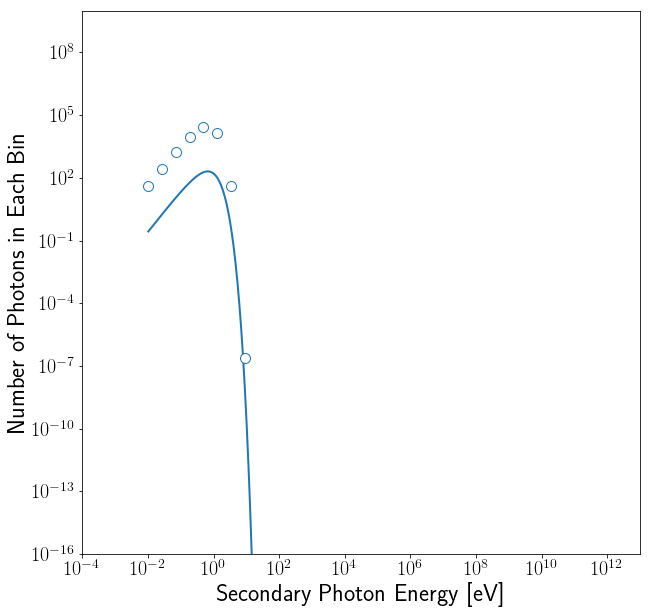

In [51]:
log_bin_width = spectools.get_log_bin_width(sec_phot_tf.get_eng())


ax = plt.subplot(1,1,1)
plt.rc('text', usetex=True)
comp_elec_kineng = np.array([3.5e3])

sec_phot_tf.plot(ax, ind=comp_elec_kineng, fac=log_bin_width*sec_phot_tf.get_eng(), indtype='in_eng', linewidth=2)

plt.gca().set_prop_cycle(None)

ICS_test_tf.plot(ax, ind=comp_elec_kineng, indtype='in_eng', linewidth=0, marker='o', markersize='10', 
    markerfacecolor='w', markevery=15,)
ax.set_xscale('log')
ax.set_yscale('log')

plt.tick_params(axis='both', which='major', labelsize=20)

plt.xlabel('Secondary Photon Energy [eV]',fontsize=24)

plt.ylabel('Number of Photons in Each Bin',fontsize=24)
plt.axis([1e-4, 1e13, 1e-16, 1e10])

In [54]:
print(sec_phot_tf.at_in_eng([3500])[0].totN())
print(ICS_test_tf.at_in_eng([3500])[0].totN())
print(sec_phot_tf.at_in_eng([3500])[0].toteng())
print(ICS_test_tf.at_in_eng([3500])[0].toteng())

5431.2544729
32496.8429108
3506.95343272
29521.4211844


In [17]:
sec_phot_tf[100].totN('bin')
utils.compare_arr([sec_phot_tf.get_in_eng(), ICS_test_tf.get_in_eng()])

ValueError: all input arrays must have the same shape

In [ ]:
print(eleceng[0])